# Цель занятия
На этом занятии мы рассмотрим применение алгоритма агломеративной кластеризации для задачи кластеризации.

Агломеративная кластеризация — это один из методов кластерного анализа, который используется для группировки объектов в иерархическую структуру. Он начинается с того, что каждый объект представляется отдельным кластером, а затем последовательно объединяет наиболее похожие кластеры до тех пор, пока не будет получен единственный кластер, содержащий все объекты. 

Основные шаги агломеративной кластеризации:
1. Инициализация: Каждый объект представляется в отдельном кластере.
2. Вычисление матрицы расстояний: Вычисляется матрица расстояний между всеми парами кластеров. Расстояние может быть определено различными способами, например, евклидово расстояние или корреляция.
3. Объединение кластеров: Наиболее похожие кластеры объединяются в один кластер на основе определенного критерия объединения. Распространенными критериями являются минимальное расстояние (single linkage), максимальное расстояние (complete linkage) или среднее расстояние (average linkage) между кластерами.
4. Обновление матрицы расстояний: Матрица расстояний обновляется, чтобы отразить новые расстояния между объединенными кластерами.
5. Повторение шагов 3 и 4: Шаги объединения кластеров и обновления матрицы расстояний повторяются до тех пор, пока все объекты не будут объединены в один кластер.
6. Формирование дендрограммы: В результате агломеративной кластеризации можно получить дендрограмму, которая представляет собой дерево объединений кластеров. По оси X дендрограммы отображаются объекты или кластеры, а по оси Y отображается мера расстояния или сходства.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance
from scipy.cluster import hierarchy
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Генерируем случайные данные
np.random.seed(0)
X = np.random.rand(100, 2)

# Задаем количество кластеров
n_clusters = 3

In [3]:
# Применяем алгоритм агломеративной кластеризации
agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
agglomerative.fit(X)

# Получаем метки кластеров
labels = agglomerative.labels_

# Вычисляем матрицу расстояний между кластерами
dist_matrix = distance.squareform(distance.pdist(X))
linkage_matrix = hierarchy.linkage(dist_matrix, method="ward")

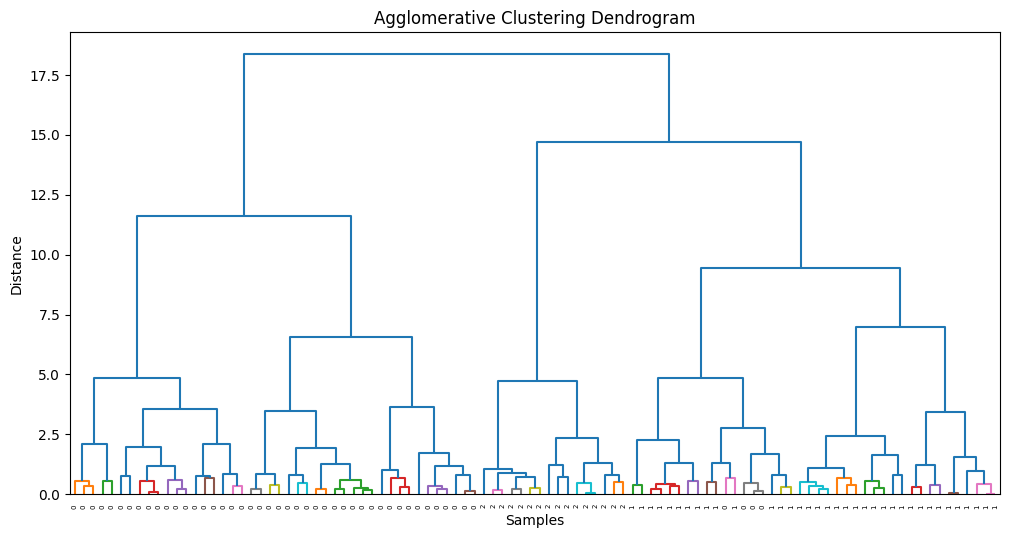

In [4]:
# Визуализация результатов с дендрограммой
plt.figure(figsize=(12, 6))

# Построение дендрограммы
dendrogram = hierarchy.dendrogram(linkage_matrix, color_threshold=0.7, labels=labels)

plt.title("Agglomerative Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

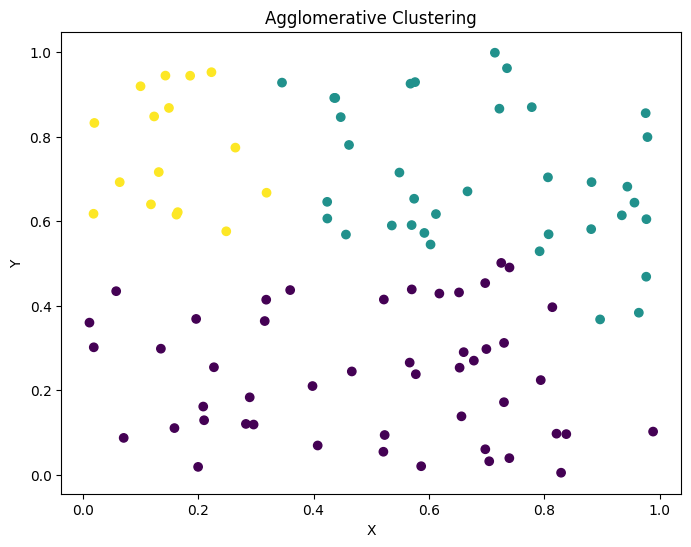

In [5]:
# Визуализация результатов кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
plt.title("Agglomerative Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()